<a href="https://colab.research.google.com/github/mongoq/thesis/blob/main/binary_benign_malign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: https://github.com/Advay-K/SkinCancerDetection

In [1]:
! git clone https://github.com/Advay-K/SkinCancerDetection.git

Cloning into 'SkinCancerDetection'...
remote: Enumerating objects: 3323, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 3323 (delta 0), reused 6 (delta 0), pack-reused 3317
Receiving objects: 100% (3323/3323), 162.19 MiB | 16.17 MiB/s, done.


In [41]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, losses
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

def detect(image):

    path = 'skin_cancer_data'
    train_dir = os.path.join(path, 'train')
    test_dir = os.path.join(path, 'test')
    #train
    train_benign = os.path.join(train_dir, 'benign or not skin cancer')
    train_malignant = os.path.join(train_dir, 'malignant skin cancer')
    #test
    test_benign = os.path.join(test_dir, 'benign or not skin cancer')
    test_malignant = os.path.join(test_dir, 'malignant skin cancer')

    train_img_gen = ImageDataGenerator(rescale = 1./255)
    test_img_gen = ImageDataGenerator(rescale = 1./255)

    generate_train = train_img_gen.flow_from_directory(batch_size=128, directory=train_dir, shuffle=True, target_size = (224, 224),
                                                       class_mode='binary')

    generate_test = test_img_gen.flow_from_directory(batch_size=128, directory=test_dir, target_size = (224, 224), class_mode='binary')

    #neural network

    model = Sequential([
        layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (224, 224, 3)),
        layers.MaxPooling2D(pool_size = (2, 2)),
        layers.Flatten(),
        layers.Dense(10, activation= 'relu'),
        layers.Dense(1, activation = 'sigmoid')
    ])

    model.summary()

    model.compile(optimizer = 'adam', loss = losses.BinaryCrossentropy(), metrics = ['accuracy'])

    total_train_size = len(os.listdir(train_benign)) + len(os.listdir(train_malignant))
    total_test_size = len(os.listdir(test_benign)) + len(os.listdir(test_malignant))


    model.fit(generate_train, batch_size = 128, epochs = 50, steps_per_epoch = total_train_size // 128,
              validation_data = generate_test, validation_steps = total_test_size // 128)


    result = model.predict(image)
    return result
    # if result[0][0] == 1:
    #     return 'malignant'
    # else:
    #     return 'benign'
    #
    # return None

In [2]:
cd SkinCancerDetection/

/content/SkinCancerDetection


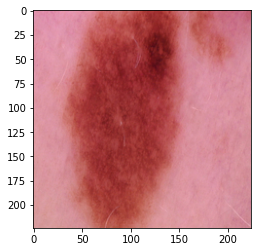

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 197136)            0         
                                                                 
 dense_8 (Dense)             (None, 10)                1971370   
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,971,829
Trainable par

In [42]:
import cv2
import detectSkinCancer
from tensorflow.keras.preprocessing import image
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input

#img = image.load_img(os.path.join('smt', 'test_image.png'), target_size=(224, 224))
img = image.load_img('1003.jpg', target_size=(224, 224)) # 1004.jpg --> benign !!!

plt.imshow(img)
plt.show()


img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)


result = detectSkinCancer.detect(img_preprocessed)[0][0]
print(result)

if (result > 0.6):
    print('Detection Result: benign :-)')
else:
    print('Detection Result: malign :-/')


In [ ]:
! cat "/content/SkinCancerDetection/skin_cancer_data/test/benign or not skin cancer/1003.jpg"